In [72]:
import pandas as pd
import numpy as np
import geopandas as gp
import seaborn as sns

%matplotlib inline

In [208]:
df = pd.read_csv('D:/TNC-Demand-Model/Outputs/OTP_Transit_Travel_Times.csv')

In [168]:
df[df['origin'] == 17031980000].travel_time.mean()/60

172.74523809511444

In [169]:
df[df['origin'] == 17031980000].walk_distance.mean()

5153.363111227207

In [174]:
for year in [2018,2019,2020]:
    print(year)
    for month in [1,2,3,4,5,6,7,8,9,10,11,12]: 
        print(month)
        print(df[(df['YEAR'] == year) & (df['MONTH'] == month)].travel_time.mean())

2018
1
nan
2
nan
3
nan
4
nan
5
nan
6
nan
7
nan
8
nan
9
nan
10
nan
11
4240.703760905631
12
4240.703760905631
2019
1
4238.930170563538
2
4238.778420182388
3
8258.790017052495
4
8407.024695190716
5
8413.47042151111
6
8413.780521610743
7
8413.796213538419
8
8413.79702579322
9
8413.797068246658
10
8583.872184674901
11
6415.769531602811
12
6415.931004086474
2020
1
4329.744350691958
2
4252.565178853299
3
8258.790017052495
4
8407.024695190716
5
8413.47042151111
6
8413.780521610743
7
8413.796213538419
8
8413.79702579322
9
8413.797068246658
10
8583.872184674901
11
6415.769531602811
12
6415.931004086474


In [209]:
for year in [2018,2019,2020]:
    print(year)
    for month in [1,2,3,4,5,6,7,8,9,10,11,12]: 
        print(month)
        print(len(df[(df['YEAR'] == year) & (df['MONTH'] == month)&(df['origin'] == 17031980000)&(df['TOD'] ==1)]))

2018
1
0
2
0
3
0
4
0
5
0
6
0
7
0
8
0
9
0
10
0
11
801
12
801
2019
1
801
2
801
3
801
4
801
5
801
6
801
7
801
8
801
9
801
10
801
11
1602
12
1602
2020
1
1602
2
1602
3
801
4
801
5
801
6
801
7
801
8
801
9
801
10
801
11
1602
12
1602


In [213]:
df2 = df[['MONTH','TOD','travel_time','walk_distance','YEAR']].groupby(by = ['YEAR','MONTH','TOD'], as_index = False).mean()

In [214]:
df3 = df[['MONTH','TOD','travel_time','walk_distance','YEAR','origin']].groupby(by = ['YEAR','MONTH','origin'], as_index = False).mean()

In [215]:
df2.head(50)

,YEAR,MONTH,TOD,travel_time,walk_distance
0,2018,11,1,4769.133308,1488.666234
1,2018,11,2,3977.853106,1096.607510
2,2018,11,3,4162.303461,1127.750189
3,2018,11,4,4168.079583,1146.149125
4,2018,11,5,4126.149346,1133.990913
5,2018,12,1,4769.133308,1488.666234
6,2018,12,2,3977.853106,1096.607510
7,2018,12,3,4162.303461,1127.750189
8,2018,12,4,4168.079583,1146.149125
9,2018,12,5,4126.149346,1133.990913


In [217]:
df3[df3['origin'] == 17031010100]

,YEAR,MONTH,origin,TOD,travel_time,walk_distance
0,2018,11,17031010100,3,4601.353902,1087.346777
801,2018,12,17031010100,3,4601.353902,1087.346777
1602,2019,1,17031010100,3,4618.346486,1085.507180
2403,2019,2,17031010100,3,4618.668286,1085.405920
3204,2019,3,17031010100,3,8472.822031,4689.288360
4005,2019,4,17031010100,3,8610.297433,4832.174864
4806,2019,5,17031010100,3,8616.131372,4838.682494
5607,2019,6,17031010100,3,8616.408249,4839.002989
6408,2019,7,17031010100,3,8616.422170,4839.019377
7209,2019,8,17031010100,3,8616.422888,4839.020229


In [202]:
df[(df['origin'] == 17031980000)&(df['destination'] == 17031010100)&(df['TOD'] == 1)]

,Unnamed: 0,origin,destination,TOD,year,walk_distance,travel_time,MONTH,YEAR
3199995,3199995,17031980000,17031010100,1,2.018120e+07,1304.302592,6070.437500,11,2018
6408000,3199995,17031980000,17031010100,1,2.018120e+07,1304.302592,6070.437500,12,2018
9616005,3199995,17031980000,17031010100,1,2.018120e+07,1304.302592,6070.437500,11,2019
12824010,3199995,17031980000,17031010100,1,2.018120e+07,1304.302592,6070.437500,12,2019
16032015,3199995,17031980000,17031010100,1,2.019002e+07,1296.241578,6190.110969,1,2019
19240020,3199995,17031980000,17031010100,1,2.019020e+07,1296.077068,6192.553285,2,2019
22448025,3199995,17031980000,17031010100,1,2.019060e+07,3844.717032,15665.317414,3,2019
25656030,3199995,17031980000,17031010100,1,2.019060e+07,3896.730093,15858.639131,4,2019
28864035,3199995,17031980000,17031010100,1,2.019060e+07,3897.791584,15862.584472,5,2019
32072040,3199995,17031980000,17031010100,1,2.019060e+07,3897.813247,15862.664989,6,2019


In [200]:
df[(df['MONTH'] == 6)&(df['origin'] == 17031980000)]

,Unnamed: 0,origin,destination,TOD,year,walk_distance,travel_time,MONTH,YEAR
32072040,3199995,17031980000,17031010100,1,2.019060e+07,3897.813247,15862.664989,6,2019
32072041,3199996,17031980000,17031010100,2,2.019060e+07,3795.591977,8299.475161,6,2019
32072042,3199997,17031980000,17031010100,3,2.019060e+07,3792.987495,8717.499093,6,2019
32072043,3199998,17031980000,17031010100,4,2.019060e+07,3790.863755,8568.308202,6,2019
32072044,3199999,17031980000,17031010100,5,2.019060e+07,4240.273401,8555.480964,6,2019
...,...,...,...,...,...,...,...,...,...
76988110,3203995,17031980000,17031980100,1,2.019060e+07,NaN,19684.164520,6,2020
76988111,3203996,17031980000,17031980100,2,2.019060e+07,NaN,11504.961281,6,2020
76988112,3203997,17031980000,17031980100,3,2.019060e+07,NaN,11627.855676,6,2020
76988113,3203998,17031980000,17031980100,4,2.019060e+07,NaN,11357.739845,6,2020


In [62]:
df[(df['origin'] == 17031010100)&(df['destination'] == 17031010201)&(df['MONTH'] == 6)]

,Unnamed: 0,origin,destination,TOD,year,walk_distance,travel_time,MONTH,YEAR
28872050,5,17031010100,17031010201,1,2.019060e+07,1412.110474,1126.125001,6,2019
28872051,6,17031010100,17031010201,2,2.019060e+07,1356.666443,1121.333097,6,2019
28872052,7,17031010100,17031010201,3,2.019060e+07,1433.253894,1127.738093,6,2019
28872053,8,17031010100,17031010201,4,2.019060e+07,1388.803675,1108.444351,6,2019
28872054,9,17031010100,17031010201,5,2.019060e+07,1417.090478,1124.055624,6,2019
73784120,5,17031010100,17031010201,1,2.019060e+07,1412.110474,1126.125001,6,2020
73784121,6,17031010100,17031010201,2,2.019060e+07,1356.666443,1121.333097,6,2020
73784122,7,17031010100,17031010201,3,2.019060e+07,1433.253894,1127.738093,6,2020
73784123,8,17031010100,17031010201,4,2.019060e+07,1388.803675,1108.444351,6,2020
73784124,9,17031010100,17031010201,5,2.019060e+07,1417.090478,1124.055624,6,2020


In [58]:
len(df[df['origin'] == 17031010100])

128160

In [175]:
long_walk = df[df['walk_distance'] > 15000]

In [176]:
long_walk.origin.value_counts()

17031550100    5586
17031550200    2618
17031980000    1562
17031838800     378
17031520600     352
               ... 
17031691500       4
17031301702       4
17031841400       4
17031831800       4
17031560100       2
Name: origin, Length: 282, dtype: int64

In [177]:
long_walk.destination.value_counts()

17031550100    2436
17031550200    1232
17031640600     634
17031640300     614
17031980000     552
               ... 
17031520200       4
17031030604       4
17031530503       4
17031520100       4
17031380700       2
Name: destination, Length: 375, dtype: int64

In [178]:
long_tt = df[df['travel_time'] > 18000]

In [179]:
long_tt.origin.value_counts()

17031550100    16252
17031550200    13334
17031980000    12616
17031740400    10574
17031520600     8414
               ...  
17031320400        6
17031839000        6
17031410800        6
17031330100        6
17031320100        6
Name: origin, Length: 798, dtype: int64

In [180]:
df_daily = df.groupby(by = ['origin','destination'], as_index = False).mean()

In [181]:
car_otp = pd.read_csv('D:/TNC-Demand-Model/Outputs/OTP Travel Times/Car/20190206/traveltime_matrix_18-6.csv')

In [198]:
df[df['travel_time']>28000]

,Unnamed: 0,origin,destination,TOD,year,walk_distance,travel_time,MONTH,YEAR
44446065,2742000,17031770602,17031550100,1,2.019119e+07,15214.478616,28183.913043,10,2019
44446070,2742005,17031770602,17031550200,1,2.019119e+07,13796.480634,28512.965426,10,2019
44446365,2742300,17031770602,17031640400,1,2.019119e+07,13124.798123,28083.789966,10,2019
44446370,2742305,17031770602,17031640500,1,2.019119e+07,12794.958779,28140.851190,10,2019
44906640,3202575,17031980000,17031550100,1,2.019119e+07,16520.777701,28611.820652,10,2019
44906645,3202580,17031980000,17031550200,1,2.019119e+07,15009.912304,29040.280142,10,2019
44906940,3202875,17031980000,17031640400,1,2.019119e+07,14791.435578,28052.032313,10,2019
44906945,3202880,17031980000,17031640500,1,2.019119e+07,14449.062150,28109.093537,10,2019
44907830,3203765,17031980000,17031838800,1,2.019119e+07,13445.904514,28240.931122,10,2019
47654070,2742000,17031770602,17031550100,1,2.019120e+07,15286.287014,28242.324197,11,2019


In [189]:
df_daily[(df_daily['origin'] == 17031980000)&(df_daily['travel_time'] >15000)]

,origin,destination,Unnamed: 0,TOD,year,walk_distance,travel_time,MONTH,YEAR
640503,17031980000,17031520500,3202517.0,3.0,2.018947e+07,7609.189642,15287.386339,7.125,2019.4375
640504,17031980000,17031520600,3202522.0,3.0,2.018947e+07,7719.825899,15331.510498,7.125,2019.4375
640515,17031980000,17031550100,3202577.0,3.0,2.018947e+07,9367.385676,16756.108092,7.125,2019.4375
640516,17031980000,17031550200,3202582.0,3.0,2.018947e+07,8696.921807,16560.475298,7.125,2019.4375
640753,17031980000,17031838800,3203767.0,3.0,2.018947e+07,8783.555621,15619.709410,7.125,2019.4375


In [183]:
otp = df_daily.merge(car_otp, on = ['origin','destination'], suffixes = ('_AUTO','_TRANSIT'))

In [184]:
otp.head()

,origin,destination,Unnamed: 0,TOD,year_AUTO,walk_distance_AUTO,travel_time_AUTO,MONTH,YEAR,year_TRANSIT,depart_time,walk_distance_TRANSIT,travel_time_TRANSIT
0,17031010100,17031010100,2.0,3.0,2.018947e+07,46.000000,34.000000,7.125,2019.4375,2019011,18:6:00,48.0,36
1,17031010100,17031010201,7.0,3.0,2.018947e+07,1408.519928,1122.549718,7.125,2019.4375,2019011,18:6:00,52.0,387
2,17031010100,17031010202,12.0,3.0,2.018947e+07,806.149782,626.000000,7.125,2019.4375,2019011,18:6:00,58.0,217
3,17031010100,17031010300,17.0,3.0,2.018947e+07,875.139689,713.713889,7.125,2019.4375,2019011,18:6:00,81.0,220
4,17031010100,17031010400,22.0,3.0,2.018947e+07,1754.805254,1751.364931,7.125,2019.4375,2019011,18:6:00,NaN,593


In [185]:
len(car_otp[(car_otp['origin']==17031010100)&(car_otp['destination']==17031010100)])

1

In [76]:
len(est)

10265616

In [69]:
est = pd.read_csv('D:/TNC-Demand-Model/Outputs/Chi_Estimation_File.csv', usecols = ['YEAR','MONTH','travel_time','Trip Seconds','ORIGIN','DESTINATION'])

In [105]:
car_otp.travel_time.mean()/60

40.67706370196583

In [120]:
est_no_zero = est[est['Trip Seconds'] > 0]

In [121]:
est_od = est_no_zero[['ORIGIN','DESTINATION','travel_time','Trip Seconds']].groupby(by = ['ORIGIN','DESTINATION'], as_index = False).mean()

In [122]:
graph_df = est_od.merge(car_otp, how = 'left', left_on = ['ORIGIN','DESTINATION'], right_on = ['origin','destination'],suffixes = ('_TRANSIT','_AUTO'))

In [123]:
graph_df['RH_TRAVEL_TIME'] = graph_df['Trip Seconds']/60
graph_df['TRANSIT_TRAVEL_TIME'] = graph_df['travel_time_TRANSIT']/60
graph_df['AUTO_TRAVEL_TIME'] = graph_df['travel_time_AUTO']/60

In [112]:
#graph_df_no_zero = graph_df[graph_df['RH_TRAVEL_TIME'] > 0]

In [97]:
#graph_df2 = graph_df_no_zero.groupby(by = ['ORIGIN','DESTINATION'], as_index = False).mean()

In [124]:
graph_df.RH_TRAVEL_TIME.mean()

8.295660283751642

In [125]:
graph_df.AUTO_TRAVEL_TIME.mean()

26.092990225030594

In [126]:
graph_df.RH_TRAVEL_TIME.min()

0.014444444444444444

In [131]:
bad_orgs = graph_df[graph_df['AUTO_TRAVEL_TIME'] >60].ORIGIN

In [132]:
bad_orgs = bad_orgs.astype(str)

In [138]:
bad_orgs.value_counts()

17031700401.0    35
17031700402.0    32
17031700100.0    21
17031700200.0    20
17031661000.0    20
                 ..
17031750300.0     1
17031251400.0     1
17031170300.0     1
17031150402.0     1
17031830800.0     1
Name: ORIGIN, Length: 125, dtype: int64

In [152]:
graph_df['AUTO_RH_TT_DIFF'] = graph_df['AUTO_TRAVEL_TIME'] - graph_df['RH_TRAVEL_TIME']

In [153]:
graph_df['AUTO_RH_TT_DIFF'].max()

67.95

In [158]:
graph_df[graph_df['AUTO_RH_TT_DIFF'] >60]

,ORIGIN,DESTINATION,travel_time_TRANSIT,Trip Seconds,year,depart_time,origin,destination,walk_distance,travel_time_AUTO,RH_TRAVEL_TIME,TRANSIT_TRAVEL_TIME,AUTO_TRAVEL_TIME,AUTO_RH_TT_DIFF
1062,1.703101e+10,1.703170e+10,9306.710082,700.600000,2019011.0,18:6:00,1.703101e+10,1.703170e+10,32.0,4320.0,11.676667,155.111835,72.000000,60.323333
1633,1.703101e+10,1.703170e+10,6880.074372,612.000000,2019011.0,18:6:00,1.703101e+10,1.703170e+10,84.0,4336.0,10.200000,114.667906,72.266667,62.066667
1634,1.703101e+10,1.703170e+10,8335.143225,531.800000,2019011.0,18:6:00,1.703101e+10,1.703170e+10,88.0,4178.0,8.863333,138.919054,69.633333,60.770000
6412,1.703102e+10,1.703170e+10,9092.874337,616.600000,2019011.0,18:6:00,1.703102e+10,1.703170e+10,91.0,4488.0,10.276667,151.547906,74.800000,64.523333
116900,1.703119e+10,1.703170e+10,7244.942717,666.000000,2019011.0,18:6:00,1.703119e+10,1.703170e+10,33.0,4299.0,11.100000,120.749045,71.650000,60.550000
119977,1.703119e+10,1.703170e+10,10557.765501,757.800000,2019011.0,18:6:00,1.703119e+10,1.703170e+10,104.0,4505.0,12.630000,175.962758,75.083333,62.453333
166803,1.703125e+10,1.703170e+10,9001.758132,604.400000,2019011.0,18:6:00,1.703125e+10,1.703170e+10,91.0,4221.0,10.073333,150.029302,70.350000,60.276667
166804,1.703125e+10,1.703170e+10,6512.805793,613.600000,2019011.0,18:6:00,1.703125e+10,1.703170e+10,101.0,4314.0,10.226667,108.546763,71.900000,61.673333
309560,1.703170e+10,1.703183e+10,8475.862107,702.700000,2019011.0,18:6:00,1.703170e+10,1.703183e+10,103.0,4340.0,11.711667,141.264368,72.333333,60.621667
309721,1.703170e+10,1.703119e+10,11829.113650,674.400000,2019011.0,18:6:00,1.703170e+10,1.703119e+10,71.0,4290.0,11.240000,197.151894,71.500000,60.260000


In [156]:
graph_df[graph_df['AUTO_RH_TT_DIFF'] >60].origin.astype(str)

1062      17031010201.0
1633      17031010202.0
1634      17031010202.0
6412      17031020100.0
116900    17031190601.0
119977    17031191100.0
166803    17031250200.0
166804    17031250200.0
309560    17031700100.0
309721    17031700200.0
309724    17031700200.0
310172    17031700301.0
310530    17031700302.0
310896    17031700401.0
310932    17031700401.0
311321    17031700402.0
311358    17031700402.0
333894    17031831300.0
335142    17031831500.0
335702    17031831600.0
Name: origin, dtype: object

In [157]:
graph_df[graph_df['AUTO_RH_TT_DIFF'] >60].destination.astype(str)

1062      17031700302.0
1633      17031700401.0
1634      17031700402.0
6412      17031700401.0
116900    17031700401.0
119977    17031700302.0
166803    17031700302.0
166804    17031700401.0
309560    17031831600.0
309721    17031190602.0
309724    17031191100.0
310172    17031250500.0
310530    17031191100.0
310896    17031180100.0
310932    17031250400.0
311321    17031010201.0
311358    17031191302.0
333894    17031700401.0
335142    17031700200.0
335702    17031700401.0
Name: destination, dtype: object

In [150]:
graph_df[graph_df['AUTO_TRAVEL_TIME'] >60]

,ORIGIN,DESTINATION,travel_time_TRANSIT,Trip Seconds,year,depart_time,origin,destination,walk_distance,travel_time_AUTO,RH_TRAVEL_TIME,TRANSIT_TRAVEL_TIME,AUTO_TRAVEL_TIME
298,1.703101e+10,1.703125e+10,7842.682101,641.000000,2019011.0,18:6:00,1.703101e+10,1.703125e+10,24.0,3697.0,10.683333,130.711368,61.616667
432,1.703101e+10,1.703153e+10,11153.455298,582.000000,2019011.0,18:6:00,1.703101e+10,1.703153e+10,76.0,3688.0,9.700000,185.890922,61.466667
452,1.703101e+10,1.703165e+10,8045.015632,685.000000,2019011.0,18:6:00,1.703101e+10,1.703165e+10,59.0,3734.0,11.416667,134.083594,62.233333
453,1.703101e+10,1.703166e+10,5676.682908,853.900000,2019011.0,18:6:00,1.703101e+10,1.703166e+10,124.0,3680.0,14.231667,94.611382,61.333333
454,1.703101e+10,1.703166e+10,12655.196930,527.200000,2019011.0,18:6:00,1.703101e+10,1.703166e+10,26.0,3629.0,8.786667,210.919949,60.483333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
350180,1.703184e+10,1.703119e+10,12527.473216,944.600000,2019011.0,18:6:00,1.703184e+10,1.703119e+10,28.0,3693.0,15.743333,208.791220,61.550000
350587,1.703184e+10,1.703183e+10,9550.230477,716.500000,2019011.0,18:6:00,1.703184e+10,1.703183e+10,21.0,3636.0,11.941667,159.170508,60.600000
350588,1.703184e+10,1.703183e+10,7609.222427,741.333333,2019011.0,18:6:00,1.703184e+10,1.703183e+10,35.0,3885.0,12.355556,126.820374,64.750000
351179,1.703184e+10,1.703183e+10,8896.808209,644.800000,2019011.0,18:6:00,1.703184e+10,1.703183e+10,85.0,3757.0,10.746667,148.280137,62.616667


In [151]:
graph_df[graph_df['AUTO_TRAVEL_TIME'] >60].origin.astype(str)

298       17031010100.0
432       17031010100.0
452       17031010100.0
453       17031010100.0
454       17031010100.0
              ...      
350180    17031835000.0
350587    17031835000.0
350588    17031835000.0
351179    17031835100.0
384346    17031842100.0
Name: origin, Length: 557, dtype: object

In [148]:
graph_df[graph_df['AUTO_TRAVEL_TIME'] >60].destination.astype(str)

298       17031250600.0
432       17031530501.0
452       17031650500.0
453       17031660302.0
454       17031660600.0
              ...      
350180    17031191302.0
350587    17031831500.0
350588    17031831600.0
351179    17031831600.0
384346    17031700301.0
Name: destination, Length: 557, dtype: object

In [139]:
bad_dests = graph_df[graph_df['AUTO_TRAVEL_TIME'] >60].ORIGIN

In [144]:
bad_dests = bad_dests.astype(str)
values = bad_dests.value_counts()

In [146]:
values.head(20)

17031700401.0    35
17031700402.0    32
17031700100.0    21
17031700200.0    20
17031661000.0    20
17031700501.0    20
17031010300.0    15
17031831600.0    14
17031020200.0    13
17031010201.0    13
17031010100.0    12
17031650500.0    12
17031661100.0    11
17031831500.0    11
17031700302.0    10
17031010202.0    10
17031700301.0     9
17031660600.0     8
17031660800.0     8
17031191200.0     8
Name: ORIGIN, dtype: int64

In [166]:
graph_df[graph_df['AUTO_RH_TT_DIFF'] < -15]

,ORIGIN,DESTINATION,travel_time_TRANSIT,Trip Seconds,year,depart_time,origin,destination,walk_distance,travel_time_AUTO,RH_TRAVEL_TIME,TRANSIT_TRAVEL_TIME,AUTO_TRAVEL_TIME,AUTO_RH_TT_DIFF
46997,1.703106e+10,1.703106e+10,30.000000,939.277820,2019011.0,18:6:00,1.703106e+10,1.703106e+10,44.0,32.0,15.654630,0.500000,0.533333,-15.121297
140255,1.703122e+10,1.703122e+10,10.000000,946.349167,2019011.0,18:6:00,1.703122e+10,1.703122e+10,10.0,6.0,15.772486,0.166667,0.100000,-15.672486
212860,1.703135e+10,1.703198e+10,10157.222855,2977.385391,2019011.0,18:6:00,1.703135e+10,1.703198e+10,47.0,2035.0,49.623090,169.287048,33.916667,-15.706423
220941,1.703139e+10,1.703139e+10,26.000000,996.491287,2019011.0,18:6:00,1.703139e+10,1.703139e+10,36.0,26.0,16.608188,0.433333,0.433333,-16.174855
230318,1.703141e+10,1.703198e+10,10025.324387,3210.565686,2019011.0,18:6:00,1.703141e+10,1.703198e+10,207.0,2280.0,53.509428,167.088740,38.000000,-15.509428
237616,1.703143e+10,1.703143e+10,4.000000,954.112509,2019011.0,18:6:00,1.703143e+10,1.703143e+10,6.0,4.0,15.901875,0.066667,0.066667,-15.835208
395831,1.703198e+10,1.703108e+10,8755.313169,2754.246657,2019011.0,18:6:00,1.703198e+10,1.703108e+10,NaN,1824.0,45.904111,145.921886,30.400000,-15.504111
395833,1.703198e+10,1.703108e+10,9014.440933,2840.478478,2019011.0,18:6:00,1.703198e+10,1.703108e+10,78.0,1936.0,47.341308,150.240682,32.266667,-15.074641
395834,1.703198e+10,1.703108e+10,8797.792588,2818.312975,2019011.0,18:6:00,1.703198e+10,1.703108e+10,82.0,1824.0,46.971883,146.629876,30.400000,-16.571883
395837,1.703198e+10,1.703108e+10,8356.076201,2667.103227,2019011.0,18:6:00,1.703198e+10,1.703108e+10,75.0,1634.0,44.451720,139.267937,27.233333,-17.218387


In [164]:
graph_df[graph_df['AUTO_RH_TT_DIFF'] < -15].origin.astype(str)

46997     17031061902.0
140255    17031222700.0
212860    17031351000.0
220941    17031390400.0
230318    17031411000.0
237616    17031430200.0
395831    17031980000.0
395833    17031980000.0
395834    17031980000.0
395837    17031980000.0
395838    17031980000.0
395839    17031980000.0
395840    17031980000.0
396048    17031980000.0
396052    17031980000.0
396077    17031980000.0
396081    17031980000.0
396088    17031980000.0
396089    17031980000.0
396096    17031980000.0
396116    17031980000.0
396123    17031980000.0
396124    17031980000.0
396125    17031980000.0
396126    17031980000.0
396130    17031980000.0
396401    17031980000.0
396421    17031980000.0
396446    17031980000.0
396459    17031980000.0
396460    17031980000.0
396469    17031980000.0
396472    17031980000.0
Name: origin, dtype: object

In [165]:
graph_df[graph_df['AUTO_RH_TT_DIFF'] < -15].destination.astype(str)

46997     17031061902.0
140255    17031222700.0
212860    17031980000.0
220941    17031390400.0
230318    17031980000.0
237616    17031430200.0
395831    17031081201.0
395833    17031081300.0
395834    17031081401.0
395837    17031081500.0
395838    17031081600.0
395839    17031081700.0
395840    17031081800.0
396048    17031280100.0
396052    17031281900.0
396077    17031310200.0
396081    17031310600.0
396088    17031330100.0
396089    17031330200.0
396096    17031351000.0
396116    17031390700.0
396123    17031410500.0
396124    17031410600.0
396125    17031410700.0
396126    17031410800.0
396130    17031411200.0
396401    17031832900.0
396421    17031835900.0
396446    17031839200.0
396459    17031841000.0
396460    17031841100.0
396469    17031842000.0
396472    17031842300.0
Name: destination, dtype: object

<AxesSubplot:xlabel='RH_TRAVEL_TIME', ylabel='AUTO_TRAVEL_TIME'>

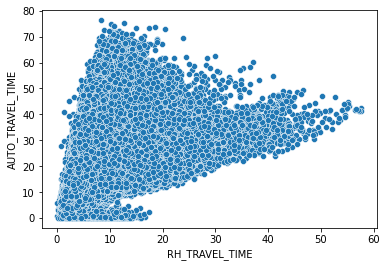

In [128]:
sns.scatterplot(x=graph_df['RH_TRAVEL_TIME'], y=graph_df['AUTO_TRAVEL_TIME'])

<AxesSubplot:xlabel='TRANSIT_TRAVEL_TIME', ylabel='AUTO_TRAVEL_TIME'>

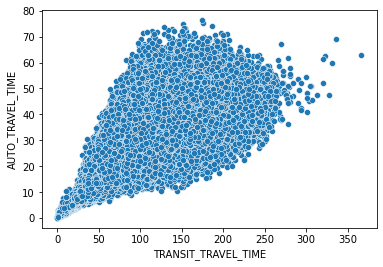

In [99]:
sns.scatterplot(x=graph_df2['TRANSIT_TRAVEL_TIME'],y= graph_df2['AUTO_TRAVEL_TIME'])

<AxesSubplot:xlabel='RH_TRAVEL_TIME', ylabel='AUTO_TRAVEL_TIME'>

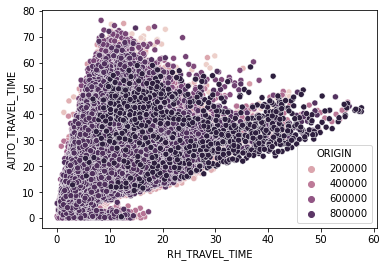

In [106]:
sns.scatterplot(x=graph_df2['RH_TRAVEL_TIME'],y=graph_df2['AUTO_TRAVEL_TIME'], hue = graph_df2['ORIGIN'])

In [159]:
rh = pd.read_csv('D:/TNC-Demand-Model/Outputs/2019_Weekday_Monthly_Ridehail_TOD.csv')

In [160]:
rh[(rh['ORIGIN'] ==  17031010201) and (rh['DESTINATION'] == 17031700302)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [90]:
len(census[census['COUNTYFP'] == '031'])

NameError: name 'census' is not defined

In [50]:
census = gp.read_file('C:/Workspace/TNC-Demand-Model/Inputs/Census Shapefiles/Tracts/tl_2019_17_tract/tl_2019_17_tract.shp')

In [51]:
census['GEOID'] = census['GEOID'].astype(float)

In [58]:
points = rh['Pickup Census Tract'].append(rh['Dropoff Census Tract'])

points = points.drop_duplicates()

In [59]:
rh_origin = census[census['GEOID'].isin(points)]

In [60]:
rh_origin = rh_origin.drop_duplicates(subset = 'GEOID')

In [61]:
rh_origin.to_file('Ride-Hailing Origins.shp', driver = 'ESRI Shapefile')

In [62]:
len(rh_origin)

1023

In [36]:
df['origin'] = df['origin'].astype(str)
df['destination'] = df['destination'].astype(str)

In [24]:
origin = pd.merge(census, df, how = 'inner', left_on = 'GEOID', right_on = 'origin')

In [31]:
origin = origin.drop_duplicates?

In [32]:
origin = origin.drop_duplicates(subset = 'origin')

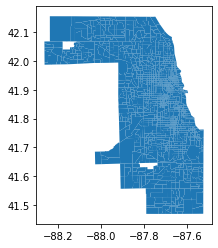

In [33]:
origin.plot()

In [34]:
origin.to_file('Origin_Tract_Travel_Times.shp', driver = 'ESRI Shapefile')

In [37]:
dest = pd.merge(census, df, how = 'inner', left_on = 'GEOID', right_on = 'destination')

In [38]:
dest.to_file('Destination_Tract_Travel_Times.shp', driver = 'ESRI Shapefile')